In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

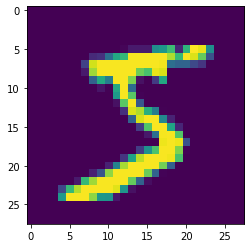

In [3]:
plt.imshow(X_train[0])
plt.show()

In [4]:
X_train = X_train.reshape((*X_train.shape,1))
print(X_train.shape)

(60000, 28, 28, 1)


In [5]:
X_train = (X_train.astype('float32') - 127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [6]:
Total_epochs = 50
batch_size = 256
no_of_batches = math.ceil(X_train.shape[0]/batch_size)
half_batch_size = 128
noise_dim = 100
adam = Adam(lr=2e-4,beta_1=0.5) 

In [7]:
generator_model = Sequential()
generator_model.add(Dense(7*7*128,input_shape = (noise_dim,)))
generator_model.add(Reshape((7,7,128)))
generator_model.add(LeakyReLU(0.2))
generator_model.add(BatchNormalization())

generator_model.add(Conv2DTranspose(64,kernel_size=(5,5),strides = (2,2),padding = 'same'))
generator_model.add(LeakyReLU(0.2))
generator_model.add(BatchNormalization())

generator_model.add(Conv2DTranspose(1,kernel_size=(5,5),strides = (2,2),padding = 'same',activation='tanh'))

generator_model.compile(loss='binary_crossentropy',optimizer=adam)
generator_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)       

In [8]:
discriminator_model = Sequential()
discriminator_model.add(Conv2D(64,(5,5),strides = (2,2),padding='same',input_shape = (28,28,1)))
discriminator_model.add(LeakyReLU(0.2))

discriminator_model.add(Conv2D(128,(5,5),strides = (2,2),padding = 'same'))
discriminator_model.add(LeakyReLU(0.2))
discriminator_model.add(Flatten())
discriminator_model.add(Dense(1,activation='sigmoid'))

discriminator_model.compile(loss='binary_crossentropy',optimizer=adam)
discriminator_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [9]:
discriminator_model.trainable = False
gan_input = Input(shape=(noise_dim,))
gan_image = generator_model(gan_input)
gan_output = discriminator_model(gan_image)

In [10]:
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [11]:
def saveImages(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    gen_images = generator_model.predict(noise)
    gen_images = gen_images.reshape(samples,28,28)
    
    plt.figure(figsize = (10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(gen_images[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images_dc2/gen_image_output{}.png'.format(epoch))
    plt.show()

C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 93.111064 G loss: 143.200084
Epoch 2 D loss: 163.212801 G loss: 217.360419
Epoch 3 D loss: 157.831321 G loss: 216.002812
Epoch 4 D loss: 159.948289 G loss: 211.164203
Epoch 5 D loss: 162.208996 G loss: 203.315064
Epoch 6 D loss: 161.929215 G loss: 200.441800
Epoch 7 D loss: 161.693411 G loss: 199.306340
Epoch 8 D loss: 161.501773 G loss: 198.768613
Epoch 9 D loss: 161.347606 G loss: 198.520988
Epoch 10 D loss: 160.773171 G loss: 204.466786


C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


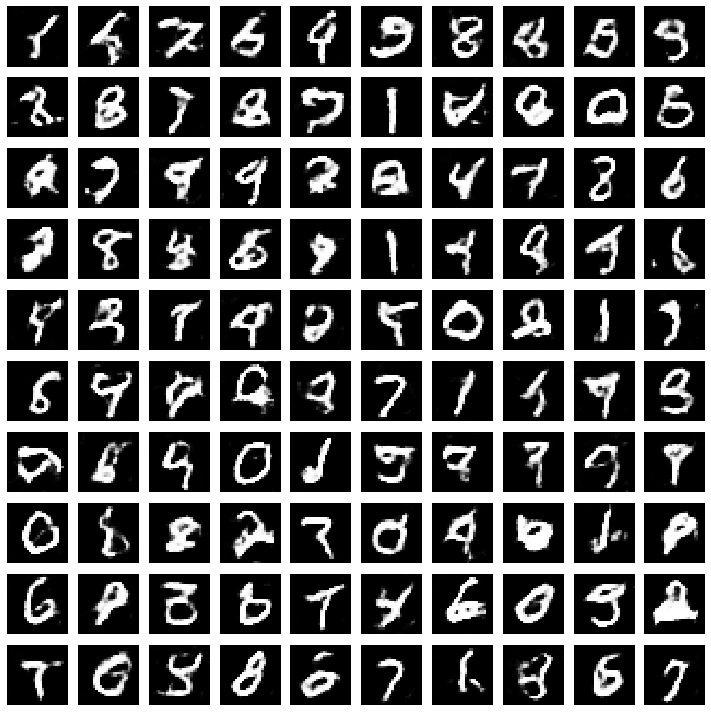

Epoch 11 D loss: 160.724513 G loss: 200.644135
Epoch 12 D loss: 160.795981 G loss: 200.152054
Epoch 13 D loss: 160.563815 G loss: 199.563777
Epoch 14 D loss: 160.505942 G loss: 200.284133
Epoch 15 D loss: 159.850157 G loss: 207.375694
Epoch 16 D loss: 160.191258 G loss: 201.668068
Epoch 17 D loss: 160.052589 G loss: 201.133992
Epoch 18 D loss: 159.971041 G loss: 201.709544
Epoch 19 D loss: 159.915378 G loss: 202.988976
Epoch 20 D loss: 159.908419 G loss: 202.507543


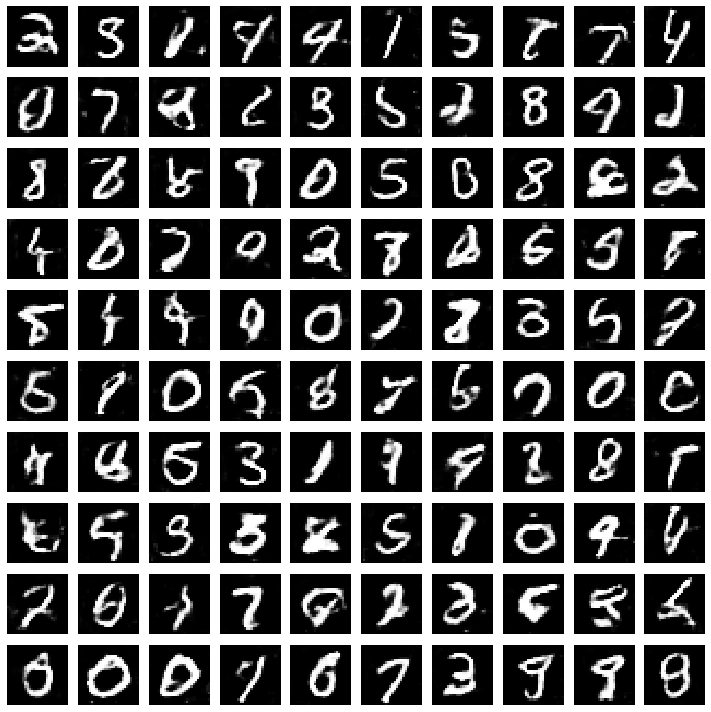

Epoch 21 D loss: 159.493646 G loss: 206.976041
Epoch 22 D loss: 159.666975 G loss: 203.204464
Epoch 23 D loss: 159.651338 G loss: 203.562744
Epoch 24 D loss: 159.563877 G loss: 203.894044
Epoch 25 D loss: 159.470975 G loss: 204.931940
Epoch 26 D loss: 159.313907 G loss: 204.902545
Epoch 27 D loss: 159.388634 G loss: 205.147080
Epoch 28 D loss: 159.127723 G loss: 205.585369
Epoch 29 D loss: 159.104025 G loss: 206.087084
Epoch 30 D loss: 158.879110 G loss: 206.522523


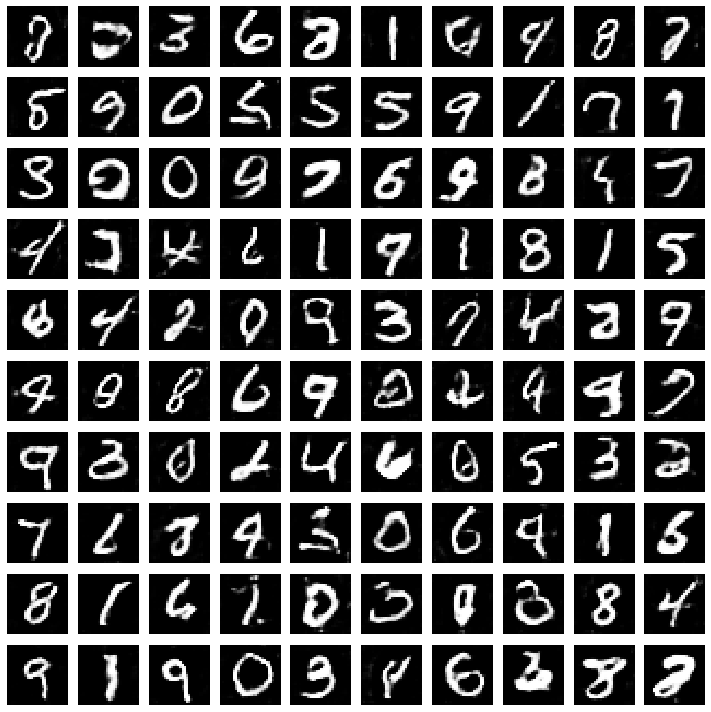

Epoch 31 D loss: 158.889985 G loss: 207.484639
Epoch 32 D loss: 158.749332 G loss: 207.540520
Epoch 33 D loss: 158.576049 G loss: 208.553447
Epoch 34 D loss: 158.343206 G loss: 208.685856
Epoch 35 D loss: 158.102973 G loss: 210.251599
Epoch 36 D loss: 158.088405 G loss: 209.971809
Epoch 37 D loss: 157.761519 G loss: 211.109091
Epoch 38 D loss: 157.539493 G loss: 211.909387
Epoch 39 D loss: 157.526753 G loss: 212.798395
Epoch 40 D loss: 157.254277 G loss: 213.404589


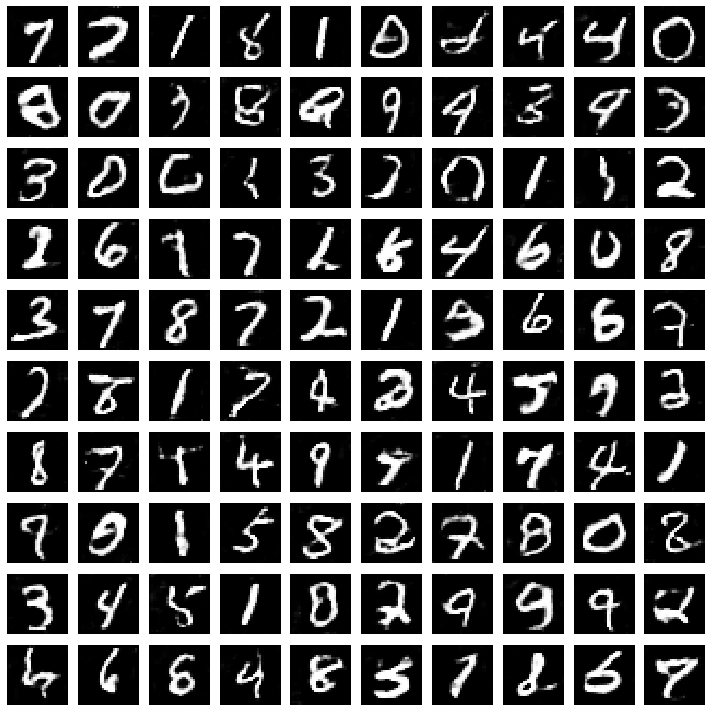

Epoch 41 D loss: 157.009258 G loss: 213.849043
Epoch 42 D loss: 156.706747 G loss: 214.675695
Epoch 43 D loss: 156.556791 G loss: 215.463546
Epoch 44 D loss: 156.456014 G loss: 216.817861
Epoch 45 D loss: 156.232536 G loss: 217.355532
Epoch 46 D loss: 155.982891 G loss: 218.467542
Epoch 47 D loss: 155.883518 G loss: 219.380274
Epoch 48 D loss: 155.690929 G loss: 220.085163
Epoch 49 D loss: 155.256202 G loss: 220.919277
Epoch 50 D loss: 155.122168 G loss: 221.965921


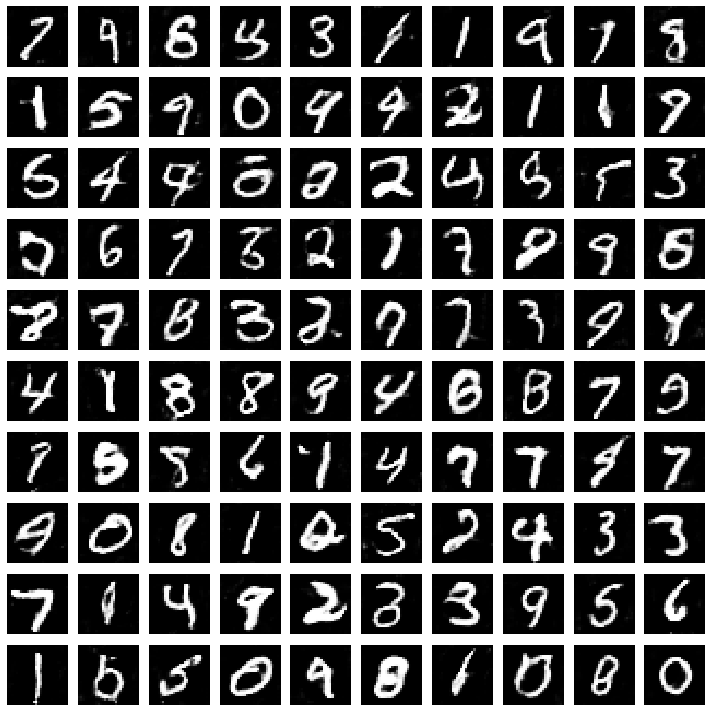

In [12]:
d_loss_list = []
g_loss_list = []
for epoch in range(1,Total_epochs+1):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    for step in range(no_of_batches):
        idx = np.random.randint(0,X_train.shape[0],half_batch_size)
        real_images = X_train[idx]
        
        noise = np.random.normal(0,1,size=(half_batch_size,noise_dim))
        fake_images = generator_model.predict(noise)
        
        real_y = np.ones((half_batch_size,1)) * 0.9
        fake_y = np.zeros((half_batch_size,1))
        
        d_loss_real = discriminator_model.train_on_batch(real_images,real_y)
        d_loss_fake = discriminator_model.train_on_batch(fake_images,fake_y)
        
        d_loss = (d_loss_fake+d_loss_real)/2.0 
        
        epoch_d_loss += d_loss
        
        #Train Generator in which Discriminator is frozen
        noise_ground = np.random.normal(0,1,size=(batch_size,noise_dim))
        ground_truth_y = np.ones((batch_size,1))
        g_loss = model.train_on_batch(noise_ground,ground_truth_y)
        epoch_g_loss += g_loss
    print("Epoch %d D loss: %f G loss: %f" % ((epoch), epoch_d_loss, epoch_g_loss))
    d_loss_list.append(epoch_d_loss)
    g_loss_list.append(epoch_g_loss)
    if epoch%10==0:
        generator_model.save("model_dc2/generator{}.h5".format(epoch))
        saveImages(epoch)

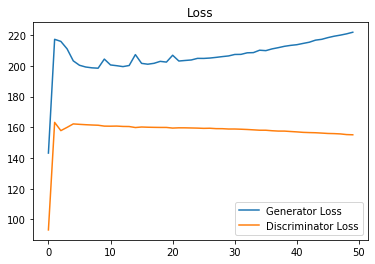

In [13]:
plt.plot(g_loss_list,label="Generator Loss")
plt.plot(d_loss_list,label="Discriminator Loss")
plt.title("Loss")
plt.legend()
plt.show()